In [11]:
# import libraries
import pandas as pd
import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [12]:
# Read Mapbox API Key
load_dotenv()
mapbox_api = os.getenv("mapbox")
px.set_mapbox_access_token(mapbox_api)

In [13]:
# Import Florida Median Home Prices CSV to Panda Dataframes
file_path = Path("Florida-Median-Home-Prices-By-County-Q1-2021.csv")
re_data = pd.read_csv(file_path)

In [14]:
# Preview Data
re_data.head()

,County,Median Home Price Q1 2021
0,Alachua County,"$237,288"
1,Baker County,"$151,241"
2,Bay County,"$220,032"
3,Bradford County,"$120,402"
4,Bevard County,"$252,790"


In [15]:
# Change values from string to float, remove $
re_data[re_data.columns[1:]] = re_data[re_data.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

In [16]:
# Sort data by Median Home Price
re_data.sort_values("Median Home Price Q1 2021")

,County,Median Home Price Q1 2021
36,Liberty County,81608.0
19,Glades County,83347.0
13,Dixie County,85303.0
21,Hamilton County,87041.0
22,Hardee County,90627.0
...,...,...
40,Martin County,340082.0
41,Miami-Dade County,360149.0
53,St. Johns County,368792.0
10,Collier County,401446.0


In [17]:
# Save sorted data as a new DF
re_data_sorted_by_median_home_price = re_data.sort_values("Median Home Price Q1 2021")

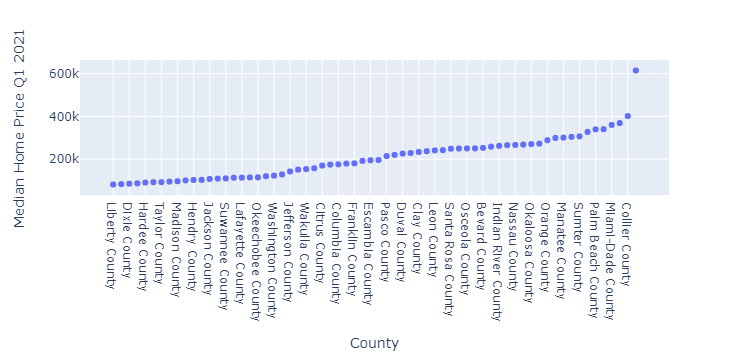

In [18]:
# Scatter plot showing Florida median home prices per county in ascending order
px.scatter(re_data_sorted_by_median_home_price, x="County", y="Median Home Price Q1 2021")

In [19]:
# Import Lat Long CSV to Panda Dataframes for MapBox
file_path = Path("lat_long.csv")
lat_long_data = pd.read_csv(file_path)

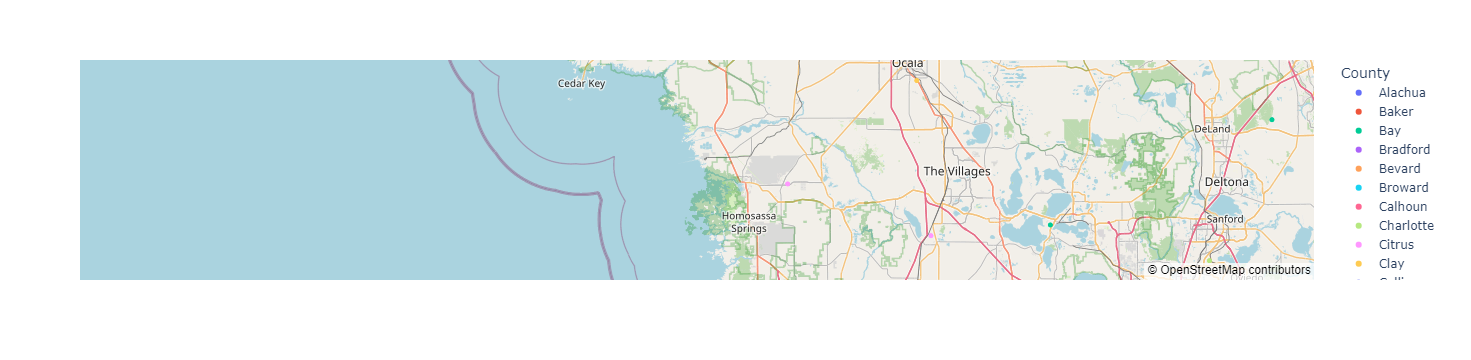

In [22]:
# Florida counties shown with MapBox
fl_county_map = px.scatter_mapbox(
    lat_long_data,
    lat="Lat",
    lon="Long",
    color="County"
)
fl_county_map.update_layout(mapbox_style="open-street-map")
fl_county_map.show()